# Facebook Metrics Analysis

*__Author:__ Tomas Ruan Rollan*
<br>
*__LinkedIn:__ https://www.linkedin.com/in/tomas-ruan/*
<br>
*__Email:__ tomruarol@gmail.com*

We will be working with the UCI’s Facebook metrics data available from the UCI archive. <br>
This is a small data set used in the study of predicting the social media performance metrics such as the number of people who have clicked anywhere on the Facebook post or the number of post ‘likes’. <br>
The first seven features were used as the explanatory variables. <br>
The paper published as part of the study can be accessed here.

<a id="1"></a>
### 1. Imports

In [36]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# For oversampling
from imblearn.over_sampling import SMOTE;
from imblearn.over_sampling import SMOTENC;

# Figures inline and set visualization style
%matplotlib inline
sns.set() #Different type of visualization

# import the necessary modelling algorithms

# Regression
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

# Model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,PolynomialFeatures

# Evaluation metrics
from sklearn.metrics import accuracy_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Show multiple statements at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<a id="2"></a>
### 2. EDA & Data Cleaning

In [2]:
# We import the data
data = pd.read_csv('data/dataset_facebook.csv', sep = ';')

# We take a look at the dataset to see that data was imported correctly
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [3]:
# Let's check the number of rows and columns of train and test
print('We have {} rows.'.format(data.shape[0]))
print('We have {} columns.'.format(len(data.columns))) 

We have 500 rows.
We have 19 columns.


In [4]:
# We take a first look at the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Page total likes                                                       500 non-null int64
Type                                                                   500 non-null object
Category                                                               500 non-null int64
Post Month                                                             500 non-null int64
Post Weekday                                                           500 non-null int64
Post Hour                                                              500 non-null int64
Paid                                                                   499 non-null float64
Lifetime Post Total Reach                                              500 non-null int64
Lifetime Post Total Impressions                                        500 non-null int64
Lifetime Engaged Users                                                 500 non-nul

We can see we have some missing values in some of the columns, most of them are a really small number, which shouldn't make a huge difference. We will have a look at them afterwards, let's first check if there are any duplicates:

<a id="2.1"></a>
###### 2.1. Duplicate Check

In [5]:
# We check if we have duplicates
data.duplicated().any()

False

It looks like there are no duplicates on the dataset, one problem less!

<a id="2.2"></a>
###### 2.2. Null / NaN Handling

In [6]:
# Let's check missing values
print(data.isnull().sum())

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

Let's first take care of the missing values in the `Paid` column. <br>
The values it can take are 1.0 and 0.0 and only 1 value is missing, let's see which one is the dominant class and by how much and we will decide to input it with that value or not.

0    361
1    139
Name: Paid, dtype: int64


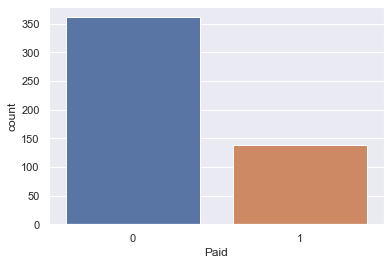

In [35]:
print(data['Paid'].value_counts())
sns.countplot(x = 'Paid', data = data);

As we can see the number of instances with a `Paid` value equal to 1.0 is way smaller than the ones with a value of 0.0. Let's input that missing value with the dominant value of the feature.

In [8]:
# We input the missing values of the Paid column as 0.0
data.Paid = data.Paid.fillna(0.0)

In the `like` column, values take a numerical value in a huge range. It is only 1 value missing also, which makes it easy to input the missing value with the mean, but taking into account we do not input decimals as we want the 

In [9]:
# We input the missing values of the like column as the mean
data.like = data.like.fillna(round(data.like.mean()))

With the `share` column happens the same as with the `like` column, hence we will do the same as we did before an input those missing values with the mean, but also without the decimal part.

In [10]:
# We input the missing values of the share column as the mean
data.share = data.like.fillna(round(data.share.mean()))

In [11]:
print(data.isnull().sum())

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   0
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

<a id="2.3"></a>
###### 2.3. Data Insights

Let's take a deeper look at our data in order to get some insights and answer several questions.

<a id="2.4"></a>
### 2.4. Label Encoding / One Hot Encoding

We have many categorical features in the dataset as for example: `Paid` has values like `1.0` or `0.0`,  `Type`, etc. <br>
We need to label this data in order to assign a number to each category, this is converting our categorical data into numerical data so our model can handle it.

In [30]:
data.dtypes

Page total likes                                                         int64
Type                                                                     int64
Category                                                                 int64
Post Month                                                               int64
Post Weekday                                                             int64
Post Hour                                                                int64
Paid                                                                     int64
Lifetime Post Total Reach                                                int64
Lifetime Post Total Impressions                                          int64
Lifetime Engaged Users                                                   int64
Lifetime Post Consumers                                                  int64
Lifetime Post Consumptions                                               int64
Lifetime Post Impressions by people who have liked y

In [24]:
# We specify the categorical columns
categorical_cols = ['Type','Category','Post Month','Post Weekday','Post Hour','Paid']

In [28]:
# We define a function to perform the label encoding
def encoding_columns(data, columns):
    for column in columns:
        try:
            lbl = LabelEncoder();
            lbl.fit(list(data[column].values));
            data[column] = lbl.transform(list(data[column].values));
        except:
            print(columns)

In [29]:
# We perform label encoding in the categorical features
encoding_columns(data, categorical_cols);

In [31]:
# Let's check our data once again
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,1,1,11,3,2,0,2752,5091,178,109,159,3078,1640,119,4,79.0,79.0,100
1,139441,2,1,11,2,9,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,130.0,164
2,139441,1,2,11,2,2,0,2413,4373,177,113,154,2812,1503,132,0,66.0,66.0,80
3,139441,1,1,11,1,9,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,1572.0,1777
4,139441,1,1,11,1,2,0,7244,13594,671,410,580,6228,3200,396,19,325.0,325.0,393


<a id="2.5"></a>
#### 2.5. Outliers Check

In [49]:
data.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

In [50]:
no_categorical_data = data[['Page total likes', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions']]

In [52]:
no_categorical_data.describe()

,Page total likes,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,123194.176000,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.946000,177.946000,212.120000
std,16272.813214,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.074532,323.074532,380.233118
min,81370.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.750000,56.750000,71.000000
50%,129600.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,101.000000,123.500000
75%,136393.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.250000,187.250000,228.500000
max,139441.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,5172.000000,6334.000000


/Users/tomasruan/anaconda3/envs/data_science/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/tomasruan/anaconda3/envs/data_science/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


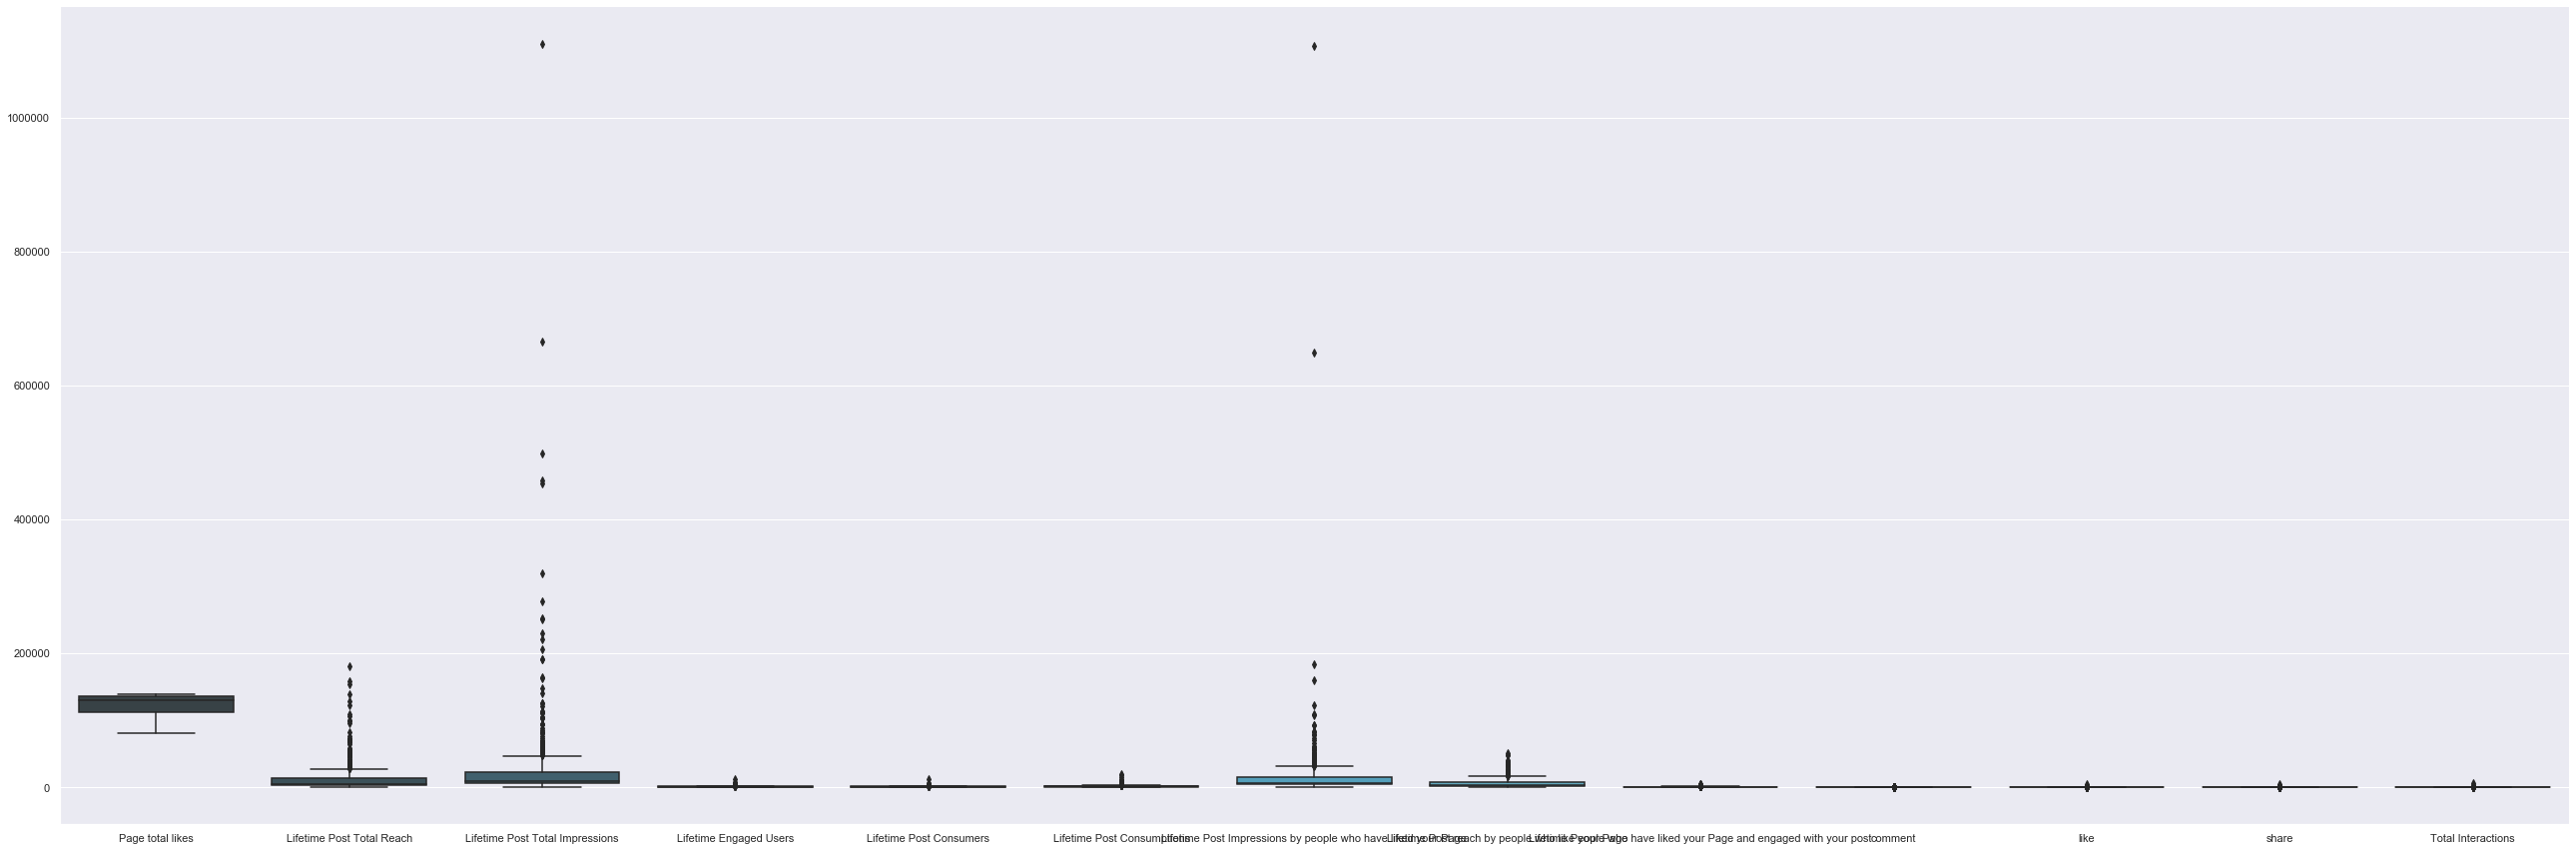

In [60]:
sns.factorplot(data=no_categorical_data,kind='box',size=12,aspect=3, palette="GnBu_d");

Let's check some variables by themself:

In [54]:
# Let's get some information about how the data is distributed (mean, min, max, etc.)
data['Page total likes'].describe()

count       500.000000
mean     123194.176000
std       16272.813214
min       81370.000000
25%      112676.000000
50%      129600.000000
75%      136393.000000
max      139441.000000
Name: Page total likes, dtype: float64

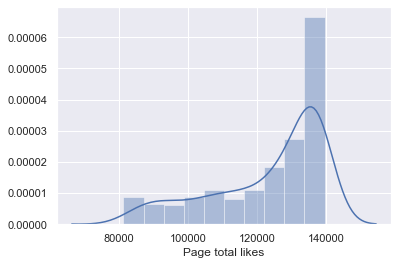

In [19]:
sns.distplot(data['Page total likes']);